<a href="https://colab.research.google.com/github/pagarsky/nn2022/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №1
### з дисципліни "Нейронні мережі"
### студента групи КН-31/2
### Пагарського Олексія
#### Варіант №7

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets as ds

from google.colab import drive

### NumPy
#### (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Властивість shape та метод reshape. Операції над масивами. Використати arange, random.

In [ ]:
arr = np.random.rand(2, 3)
print(arr, arr.shape)

arr = arr.reshape((3, 2))
print(arr, arr.shape)

[[0.62803434 0.30892001 0.94979596]
 [0.4699699  0.436017   0.52966885]] (2, 3)
[[0.62803434 0.30892001]
 [0.94979596 0.4699699 ]
 [0.436017   0.52966885]] (3, 2)


In [ ]:
arr[0][1] = 2e+12
print(arr)

[[6.28034341e-01 2.00000000e+12]
 [9.49795964e-01 4.69969899e-01]
 [4.36017001e-01 5.29668847e-01]]


In [ ]:
np.arange(12, dtype=np.float32)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
      dtype=float32)

### Pandas
#### (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc, індексація з умовами відбору, групування, пошук «пустих» значень, сортування..);


In [ ]:
df = pd.DataFrame.from_dict({"col1": np.arange(12), "col2": np.arange(12, 0, -1)})
df.head()

,col1,col2
0,0,12
1,1,11
2,2,10
3,3,9
4,4,8


In [ ]:
df.describe()

,col1,col2
count,12.000000,12.000000
mean,5.500000,6.500000
std,3.605551,3.605551
min,0.000000,1.000000
25%,2.750000,3.750000
50%,5.500000,6.500000
75%,8.250000,9.250000
max,11.000000,12.000000


In [ ]:
df.loc[1]

col1     1
col2    11
Name: 1, dtype: int64

In [ ]:
df = pd.DataFrame(
    [[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield']
)
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [ ]:
df.iloc[1:]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [ ]:
df.iloc[[0, 2]]

,max_speed,shield
cobra,1,2
sidewinder,7,8


In [ ]:
df.isnull().any()

max_speed    False
shield       False
dtype: bool

In [ ]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [ ]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [ ]:
df.sort_values(by=['Max Speed'], ascending=False)

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
3,Parrot,26.0
2,Parrot,24.0


### Matplotlib
#### (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

In [ ]:
def f(x):
    return 2 * x + 4

(array([ 4.        ,  5.05263158,  6.10526316,  7.15789474,  8.21052632,
         9.26315789, 10.31578947, 11.36842105, 12.42105263, 13.47368421,
        14.52631579, 15.57894737, 16.63157895, 17.68421053, 18.73684211,
        19.78947368, 20.84210526, 21.89473684, 22.94736842, 24.        ]),
 array([ 4.47391216,  6.1918699 ,  4.00159511,  8.61987537,  8.91850147,
        12.24269858,  7.48135628, 11.66392836, 10.67968998, 14.24322188,
        17.55429185, 13.11034881, 20.24181309, 13.70769411, 20.09338588,
        21.82760934, 19.73950677, 22.19139072, 21.4551297 , 23.53003852]))

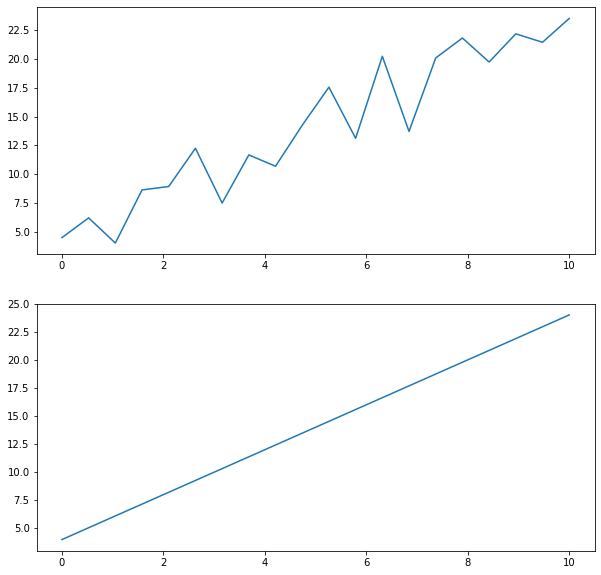

In [ ]:
x = np.linspace(0, 10, 20)
y = f(x)
y_hat = y + 2.0 * np.random.normal(size=y.shape)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))
ax1.plot(x, y_hat)
ax2.plot(x, y)
y, y_hat

In [ ]:
def mae(y, y_hat):
    return np.mean(np.absolute(y_hat - y))

def mse(y, y_hat):
    return np.mean(np.square(y_hat - y))

In [ ]:
mae(y, y_hat)

1.7173306509195005

In [ ]:
mse(y, y_hat)

4.153234471125183

In [ ]:
res = pd.DataFrame.from_dict({
    'x': x,
    'y': f(x),
    'y_hat': y_hat,
    'abs_err': np.abs(y - y_hat),
    'sqr_err': (y - y_hat) ** 2
})
res

,x,y,y_hat,abs_err,sqr_err
0,0.000000,4.000000,4.473912,0.473912,0.224593
1,0.526316,5.052632,6.191870,1.139238,1.297864
2,1.052632,6.105263,4.001595,2.103668,4.425419
3,1.578947,7.157895,8.619875,1.461981,2.137387
4,2.105263,8.210526,8.918501,0.707975,0.501229
5,2.631579,9.263158,12.242699,2.979541,8.877663
6,3.157895,10.315789,7.481356,2.834433,8.034012
7,3.684211,11.368421,11.663928,0.295507,0.087325
8,4.210526,12.421053,10.679690,1.741363,3.032344
9,4.736842,13.473684,14.243222,0.769538,0.592188


In [ ]:
res.to_csv('./results.csv')

### gdrive
#### Google colab різні способи завантаження наборів даних з інтернету, з власного компютера, з google-drive)

In [ ]:
ds.load_iris()['data'].shape

(150, 4)

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls -la ./gdrive/

total 20
dr-x------ 2 root root 4096 Feb 22 20:30 .file-revisions-by-id
drwx------ 9 root root 4096 Feb 22 20:30 MyDrive
drwx------ 2 root root 4096 Feb 22 20:30 Othercomputers
dr-x------ 2 root root 4096 Feb 22 20:30 .shortcut-targets-by-id
drwx------ 5 root root 4096 Feb 22 20:30 .Trash-0


### GPU
#### Визначити параметри доступу до графічних процесорів

In [ ]:
!nvidia-smi

Tue Feb 22 20:33:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Висновок  
#### В результаті виконання лабораторної роботи я ознайомився з середовищем google colab, бібліотеками numpy, pandas та matplotlib. 